In [193]:
import pandas as pd
import numpy as np 
import json
from sqlalchemy import create_engine
import psycopg2 
from matplotlib import pyplot as plt



In [194]:
df = pd.read_csv('C:/Users/Dell/Downloads/SUICIDES.csv') 
df

,Sl. No.,State/UT,Farmers/Cultivators - 2017,Farmers/Cultivators - 2018,Farmers/Cultivators - 2019,Farmers/Cultivators - 2020,Farmers/Cultivators - 2021
0,1,Andhra Pradesh,375.0,365.0,628.0,564,481
1,2,Arunachal Pradesh,0.0,0.0,0.0,1,0
2,3,Assam,3.0,5.0,26.0,12,153
3,4,Bihar,0.0,0.0,0.0,0,0
4,5,Chhattisgarh,285.0,182.0,233.0,227,71
5,6,Goa,0.0,0.0,0.0,0,0
6,7,Gujarat,4.0,21.0,3.0,5,0
7,8,Haryana,0.0,0.0,0.0,0,13
8,9,Himachal Pradesh,4.0,5.0,12.0,6,13
9,10,Jharkhand,0.0,0.0,0.0,0,0


In [195]:
#configuration of PostgreSQL Database
hostname = 'localhost'
database = 'Crimes'
uername = 'postgres'
pwd = 'Postsql'
port_id = 5432



In [196]:
#connect with database
conn = psycopg2.connect(
    host = hostname,
    dbname = database,
    user = uername,
    password = pwd, 
    port = port_id
)

In [197]:
cur = conn.cursor()  #create cursor

In [198]:
query = 'SELECT * FROM "Suicdes" ;' #query to retrieve all the records from the table "Suicides" which  has data offarmers or cultivators suicides




In [199]:
cur.execute(query) #execute the query

In [200]:
conn.rollback() #connection rollback

In [201]:
url = f"postgresql://{uername}:{pwd}@{hostname}:{port_id}/{database}" #url has the configurationo 

In [202]:
engine = create_engine(url)  #created engine for using it while copying dataframe to the database 

In [203]:
df.to_sql(name='Suicdes', con= engine, if_exists='replace', index=False) #df to database 

37

In [204]:
query = 'SELECT * FROM "Suicdes"'
cur.execute(query)
results = cur.fetchall()

In [205]:
print(results)

[('1', 'Andhra Pradesh', 375.0, 365.0, 628.0, 564, 481), ('2', 'Arunachal Pradesh', 0.0, 0.0, 0.0, 1, 0), ('3', 'Assam', 3.0, 5.0, 26.0, 12, 153), ('4', 'Bihar', 0.0, 0.0, 0.0, 0, 0), ('5', 'Chhattisgarh', 285.0, 182.0, 233.0, 227, 71), ('6', 'Goa', 0.0, 0.0, 0.0, 0, 0), ('7', 'Gujarat', 4.0, 21.0, 3.0, 5, 0), ('8', 'Haryana', 0.0, 0.0, 0.0, 0, 13), ('9', 'Himachal Pradesh', 4.0, 5.0, 12.0, 6, 13), ('10', 'Jharkhand', 0.0, 0.0, 0.0, 0, 0), ('11', 'Karnataka', 1157.0, 1365.0, 1331.0, 1072, 1170), ('12', 'Kerala', 42.0, 25.0, 22.0, 57, 34), ('13', 'Madhya Pradesh', 429.0, 303.0, 142.0, 235, 117), ('14', 'Maharashtra', 2426.0, 2239.0, 2680.0, 2567, 2640), ('15', 'Manipur', 0.0, 2.0, 0.0, 1, 0), ('16', 'Meghalaya', 0.0, 0.0, 0.0, 4, 3), ('17', 'Mizoram', 0.0, 17.0, 22.0, 4, 0), ('18', 'Nagaland', 0.0, 0.0, 0.0, 0, 1), ('19', 'Odisha', 0.0, 0.0, 0.0, 0, 0), ('20', 'Punjab', 243.0, 229.0, 239.0, 174, 171), ('21', 'Rajasthan', 3.0, 2.0, 2.0, 0, 0), ('22', 'Sikkim', 7.0, 1.0, 0.0, 6, 8), ('23'

In [206]:
cur.execute('''DELETE FROM "Suicdes" WHERE "State/UT" = 'Total (All India)' ''')
# executing the query we can write directly without storing it into the variable

In [207]:
conn.commit()


In [208]:
result = ''' SELECT * from "Suicdes" ''' 



In [209]:
cur.execute(result)
resultd = cur.fetchall() #fetchall method is used to fetch all the records from the table which herein case is postgresql

In [210]:
print(resultd)      #data after the deletion of "total" record

[('1', 'Andhra Pradesh', 375.0, 365.0, 628.0, 564, 481), ('2', 'Arunachal Pradesh', 0.0, 0.0, 0.0, 1, 0), ('3', 'Assam', 3.0, 5.0, 26.0, 12, 153), ('4', 'Bihar', 0.0, 0.0, 0.0, 0, 0), ('5', 'Chhattisgarh', 285.0, 182.0, 233.0, 227, 71), ('6', 'Goa', 0.0, 0.0, 0.0, 0, 0), ('7', 'Gujarat', 4.0, 21.0, 3.0, 5, 0), ('8', 'Haryana', 0.0, 0.0, 0.0, 0, 13), ('9', 'Himachal Pradesh', 4.0, 5.0, 12.0, 6, 13), ('10', 'Jharkhand', 0.0, 0.0, 0.0, 0, 0), ('11', 'Karnataka', 1157.0, 1365.0, 1331.0, 1072, 1170), ('12', 'Kerala', 42.0, 25.0, 22.0, 57, 34), ('13', 'Madhya Pradesh', 429.0, 303.0, 142.0, 235, 117), ('14', 'Maharashtra', 2426.0, 2239.0, 2680.0, 2567, 2640), ('15', 'Manipur', 0.0, 2.0, 0.0, 1, 0), ('16', 'Meghalaya', 0.0, 0.0, 0.0, 4, 3), ('17', 'Mizoram', 0.0, 17.0, 22.0, 4, 0), ('18', 'Nagaland', 0.0, 0.0, 0.0, 0, 1), ('19', 'Odisha', 0.0, 0.0, 0.0, 0, 0), ('20', 'Punjab', 243.0, 229.0, 239.0, 174, 171), ('21', 'Rajasthan', 3.0, 2.0, 2.0, 0, 0), ('22', 'Sikkim', 7.0, 1.0, 0.0, 6, 8), ('23'

In [211]:
cur.execute(' SELECT "State/UT" FROM "Suicdes" WHERE "Farmers/Cultivators - 2017" <= 0.0 ')

In [212]:
equal0 = cur.fetchall()

In [213]:
 #those state who has zero number of cultivators or farmers suicide in 2017

In [214]:
for state in equal0: #printing the states which has zero suicides of farmers in 2017
    print(state)  

('Arunachal Pradesh',)
('Bihar',)
('Goa',)
('Haryana',)
('Jharkhand',)
('Manipur',)
('Meghalaya',)
('Mizoram',)
('Nagaland',)
('Odisha',)
('Tripura',)
('Uttarakhand',)
('West Bengal',)
('Chandigarh',)
('Dadra and Nagar Haveli and Daman and Diu',)
('Delhi',)
('Jammu and Kashmir',)
('Lakshadweep',)
('Puducherry',)


In [215]:
conn.commit()

In [216]:
result = ''' SELECT * from "Suicdes" '''  #qeery to fetch ll the dta records in the table suicides from the PostgreSQL database


In [217]:
cur.execute(result) #execute the query inside the result variable 

In [218]:
all = cur.fetchall() #for fetching the rows from table i had to use the fetchall function 

In [219]:
for i in all:
    print(i)   #printing each records one by one by iterating all using for loop 

('1', 'Andhra Pradesh', 375.0, 365.0, 628.0, 564, 481)
('2', 'Arunachal Pradesh', 0.0, 0.0, 0.0, 1, 0)
('3', 'Assam', 3.0, 5.0, 26.0, 12, 153)
('4', 'Bihar', 0.0, 0.0, 0.0, 0, 0)
('5', 'Chhattisgarh', 285.0, 182.0, 233.0, 227, 71)
('6', 'Goa', 0.0, 0.0, 0.0, 0, 0)
('7', 'Gujarat', 4.0, 21.0, 3.0, 5, 0)
('8', 'Haryana', 0.0, 0.0, 0.0, 0, 13)
('9', 'Himachal Pradesh', 4.0, 5.0, 12.0, 6, 13)
('10', 'Jharkhand', 0.0, 0.0, 0.0, 0, 0)
('11', 'Karnataka', 1157.0, 1365.0, 1331.0, 1072, 1170)
('12', 'Kerala', 42.0, 25.0, 22.0, 57, 34)
('13', 'Madhya Pradesh', 429.0, 303.0, 142.0, 235, 117)
('14', 'Maharashtra', 2426.0, 2239.0, 2680.0, 2567, 2640)
('15', 'Manipur', 0.0, 2.0, 0.0, 1, 0)
('16', 'Meghalaya', 0.0, 0.0, 0.0, 4, 3)
('17', 'Mizoram', 0.0, 17.0, 22.0, 4, 0)
('18', 'Nagaland', 0.0, 0.0, 0.0, 0, 1)
('19', 'Odisha', 0.0, 0.0, 0.0, 0, 0)
('20', 'Punjab', 243.0, 229.0, 239.0, 174, 171)
('21', 'Rajasthan', 3.0, 2.0, 2.0, 0, 0)
('22', 'Sikkim', 7.0, 1.0, 0.0, 6, 8)
('23', 'Tamil Nadu', 19.0, 6

In [220]:
cur = conn.cursor()


In [221]:
conn.rollback()

In [222]:
def maxima():
    # Assuming you have already connected to the database
    # connection = sqlite3.connect("your_database.db")
    
    # Create a cursor
    cur = conn.cursor()

    # Execute each query and fetch the maximum values
    cur.execute(''' SELECT MAX("Farmers/Cultivators - 2017")  FROM "Suicdes"  ''')
    max_2017 = cur.fetchone()[0]

    cur.execute(''' SELECT MAX("Farmers/Cultivators - 2018") FROM "Suicdes" ''')
    max_2018 = cur.fetchone()[0]

    cur.execute(''' SELECT MAX("Farmers/Cultivators - 2019") FROM "Suicdes" ''')
    max_2019 = cur.fetchone()[0]

    cur.execute(''' SELECT MAX("Farmers/Cultivators - 2020") FROM "Suicdes" ''')
    max_2020 = cur.fetchone()[0]

    cur.execute(''' SELECT MAX("Farmers/Cultivators - 2021") FROM "Suicdes" ''')
    max_2021 = cur.fetchone()[0]

    # Close the cursor and connection when done
    

    return max_2017, max_2018, max_2019, max_2020, max_2021



In [223]:
maxima() #maimum suicides in 2017,2018,2019,2020,2021 respectively

(2426.0, 2239.0, 2680.0, 2567, 2640)

In [224]:
conn.commit()
cur.close()
conn.close()

In [225]:
#in 2019 the highest suicides has occured with the 2680

In [226]:
df = df.drop(36)

In [227]:
df.fillna(0, inplace=True) #filled the NAN Value with the 0 

<Figure size 3000x6000 with 0 Axes>

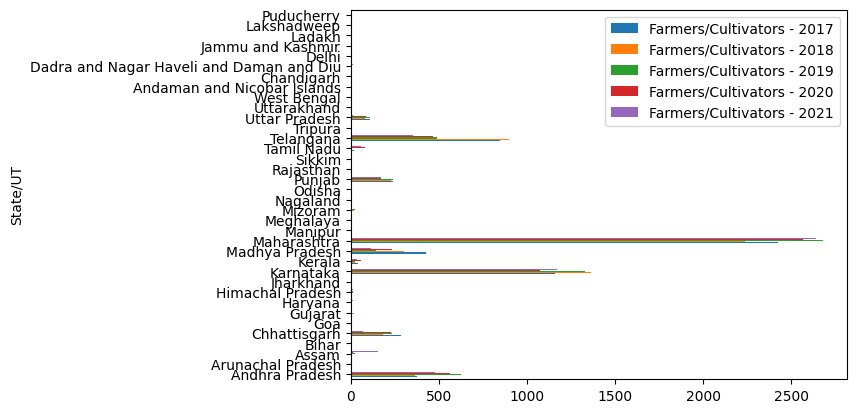

In [228]:
plt.figure(figsize=(30, 60))
df.plot(x= 'State/UT',y= ['Farmers/Cultivators - 2017','Farmers/Cultivators - 2018','Farmers/Cultivators - 2019','Farmers/Cultivators - 2020','Farmers/Cultivators - 2021'],kind = 'barh')

plt.show()

In [229]:
#The hike in maharashtara which does mean unfortunately highest number of farmers or cultivators died by suicide in The State of Maharashtra

In [230]:
#using matplotlib.pyplot for graphs

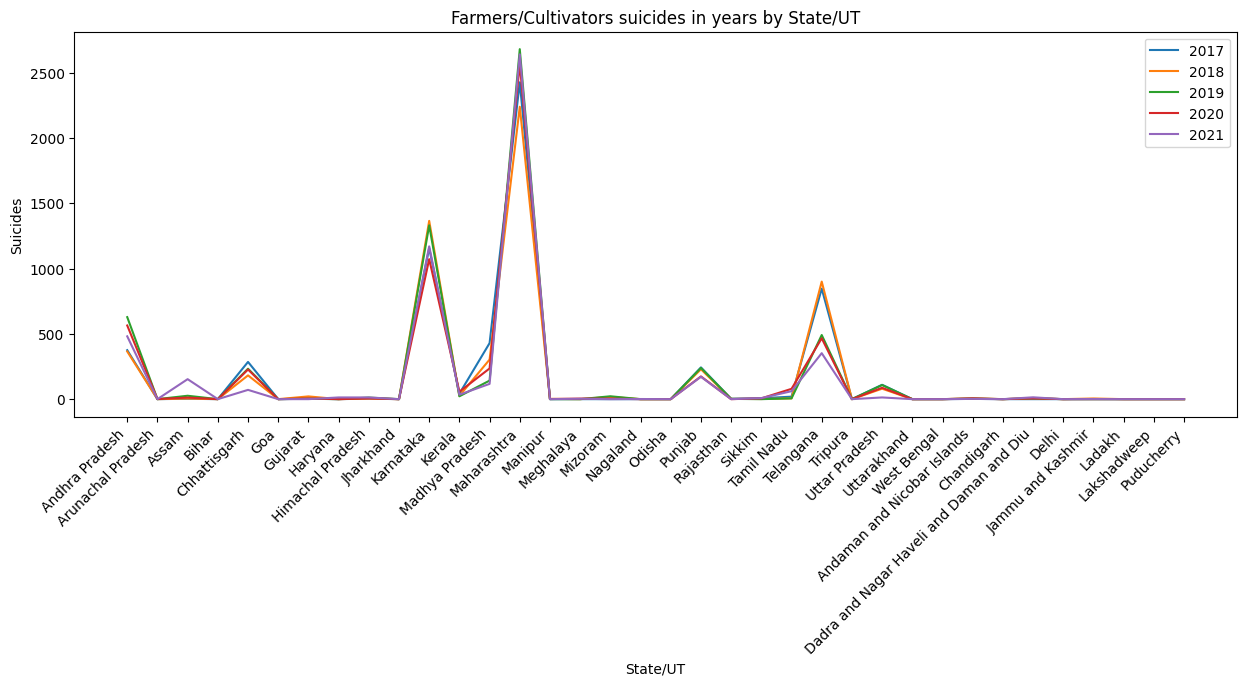

In [231]:
plt.figure(figsize = (15,5))
plt.plot(df['State/UT'], df[['Farmers/Cultivators - 2017','Farmers/Cultivators - 2018', 'Farmers/Cultivators - 2019','Farmers/Cultivators - 2020','Farmers/Cultivators - 2021']])
plt.xlabel('State/UT')
plt.ylabel('Suicides')
plt.title('Farmers/Cultivators suicides in years by State/UT')
plt.legend(['2017', '2018', '2019', '2020', '2021']) 
plt.xticks(rotation=45, ha='right')
plt.show()

In [232]:
#Maharashtra had largest number of suicides of farmers or cultivators from the year 2017 to 2021 